In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data= pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')


In [4]:
data

Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                   6                       60             8       Normal   
2                   6                       60             8       Normal   
3                   4                       30             8        Obese   
4                   4                       30             8        Obese   
..                ...                      ...           ...          ...   
369                 9                       75             3   Overweight   
370                 9                       75             3   Overweight   
371                 9                       75             3   Overweight   
372                 9                       75             3   Overweight   
373                 9                       75             3   Overweight   

    Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0           126/83          77         4200            NaN  
1           125/80          75        10000            NaN  
2           125/80          75        10000            NaN  
3           140/90          85         3000    Sleep Apnea  
4           140/90          85         3000    Sleep Apnea  
..             ...         ...          ...            ...  
369         140/95          68         7000    Sleep Apnea  
370         140/95          68         7000    Sleep Apnea  
371         140/95          68         7000    Sleep Apnea  
372         140/95          68         7000    Sleep Apnea  
373         140/95          68         7000    Sleep Apnea  

[374 rows x 13 columns]

In [ ]:
'''I) Data Preprocessing:
Purpose: Prepare the raw data for further analysis'''

In [ ]:
'''1) Data Cleaning:
           Purpose: Remove or correct inaccurate, incomplete, or irrelevant data.'''

In [5]:
'''-Checking for null values'''
data.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [6]:
''' so as we can see there null values only in the Sleep Disorder column which is categorical data.
    A null value in this column means there is no Sleep Disorder.
    We will fill null values here with a more meaningful value.
    it will be 'No Sleep Disorder' .
'''
data['Sleep Disorder'].fillna('No Sleep Disorder',inplace=True)


In [7]:
''' now lets check for null values again'''
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [ ]:
''' as we can see there are no null values now.'''

In [8]:
'''-Checking for duplicate values'''
data.duplicated().sum()

0

In [ ]:
''' as we can see there are no duplicate values in the dataset.'''

In [9]:
'''-Checking for wrong data types'''
data.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [ ]:
''' as we can see there are no wrong data types in the dataset.'''

In [10]:
'''-Checking for wrong data format'''
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
'''  we can see there are no wrong data format in the dataset.'''

In [ ]:
''' now we can move to exploratory data analysis (EDA)'''

In [11]:
data.describe()

Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000      4.000000   68.000000   5600.000000  
50%                  60.000000      5.000000   70.000000   7000.000000  
75%                  75.000000      7.000000   72.000000   8000.000000  
max                  90.000000      8.000000   86.000000  10000.000000

In [ ]:
''' we can do data profiling here as well'''

In [1]:
!pip install ydata-profiling==4.6.0

In [6]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
''' you can download the profile report here.'''
profile.to_file("report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
''' now we can move to data visualization'''

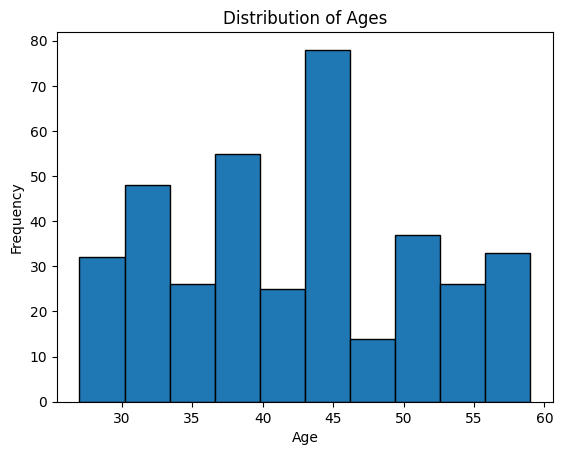

In [12]:
'''To visualize the distribution of "Age" (a continuous variable)
in your dataset,
you can create a histogram.'''
import matplotlib.pyplot as plt

plt.hist(data['Age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.show()

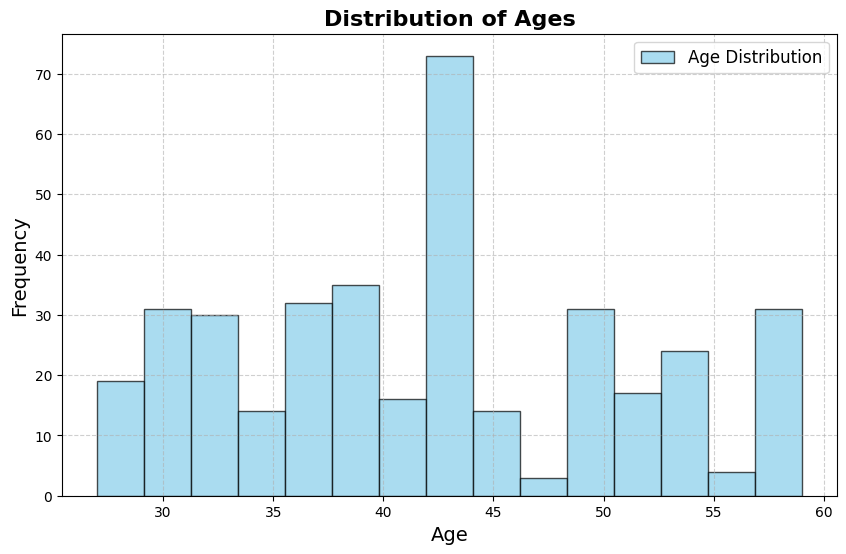

In [17]:
''' we can make it more visually appealing like this '''

plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
# Pass only the 'Age' column to plt.hist
plt.hist(data['Age'], bins=15, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Ages', fontsize=16, fontweight='bold')

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend
plt.legend(['Age Distribution'], loc='upper right', fontsize=12)

# Show the plot
plt.show()

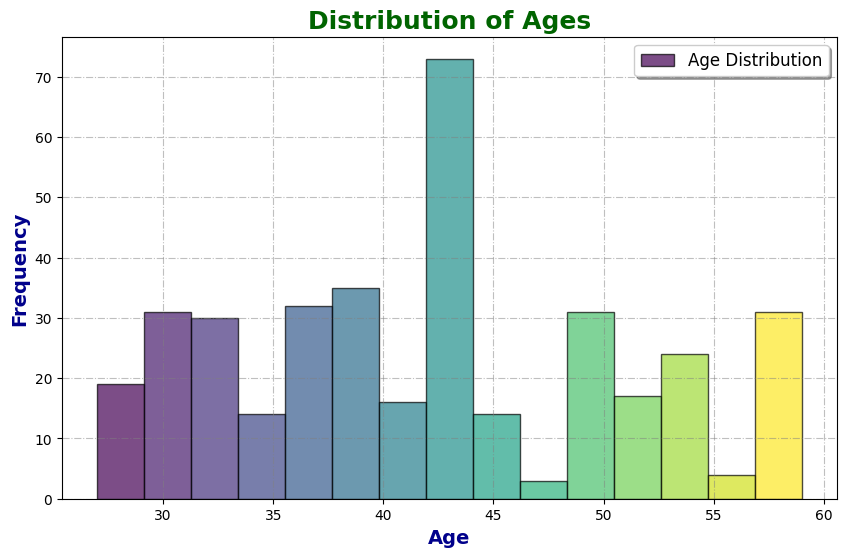

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation (assuming data is already loaded into the 'data' DataFrame)
age_data = data['Age']

# Choose a color map for a gradient effect
colors = plt.cm.viridis(np.linspace(0, 1, 15))

# Create the histogram
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
n, bins, patches = plt.hist(age_data, bins=15, color='skyblue', edgecolor='black', alpha=0.7)

# Apply the gradient color to each bin
for i in range(len(patches)):
    patches[i].set_facecolor(colors[i])

# Add labels and title with improved font properties
plt.xlabel('Age', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='darkblue')
plt.title('Distribution of Ages', fontsize=18, fontweight='bold', color='darkgreen')

# Customize the grid for a modern look
plt.grid(True, linestyle='-.', alpha=0.5, color='gray')

# Add a legend with a better location and style
plt.legend(['Age Distribution'], loc='upper right', fontsize=12, frameon=True, shadow=True)

# Show the plot
plt.show()


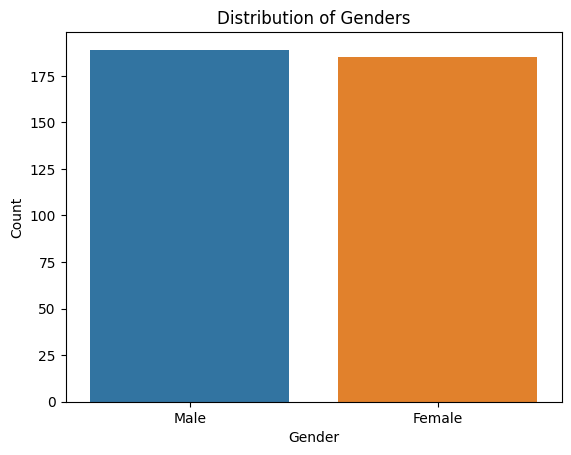

In [21]:
'''To visualize the distribution of a categorical variable, such as "Gender",
 you can create a bar chart.'''
import seaborn as sns
sns.countplot(x='Gender', data=data)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Genders')
plt.show()

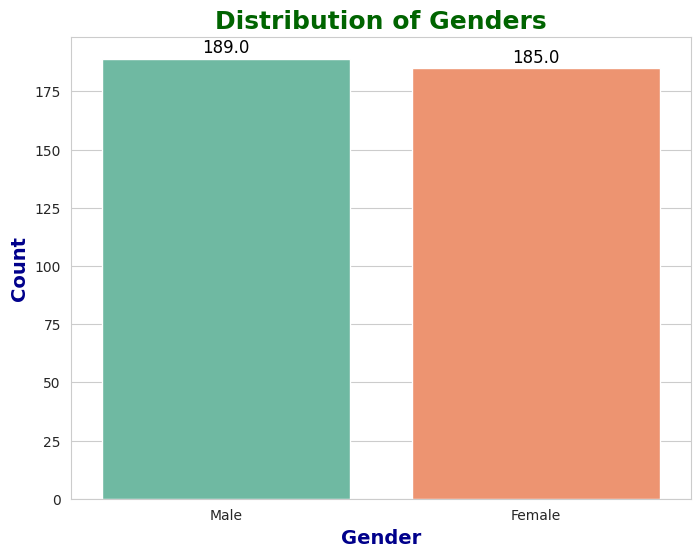

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a color palette
palette = sns.color_palette("Set2")

# Create the count plot with enhanced visuals
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, palette=palette, saturation=0.8)

# Customize labels and title with improved font properties
plt.xlabel('Gender', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='darkblue')
plt.title('Distribution of Genders', fontsize=18, fontweight='bold', color='darkgreen')

# Add value labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 8),
                       textcoords='offset points')

# Display the plot
plt.show()


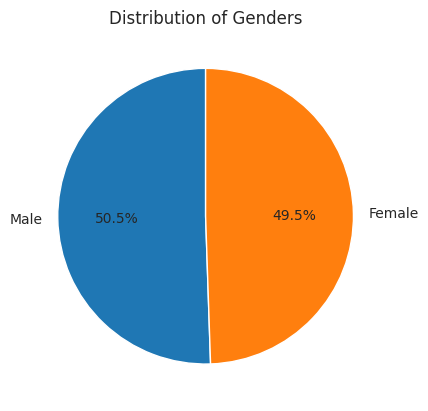

In [23]:
''' we can also see the distribution of a categorical variable
like gender using a pie chart'''
import matplotlib.pyplot as plt

gender_counts = data['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Genders')
plt.show()



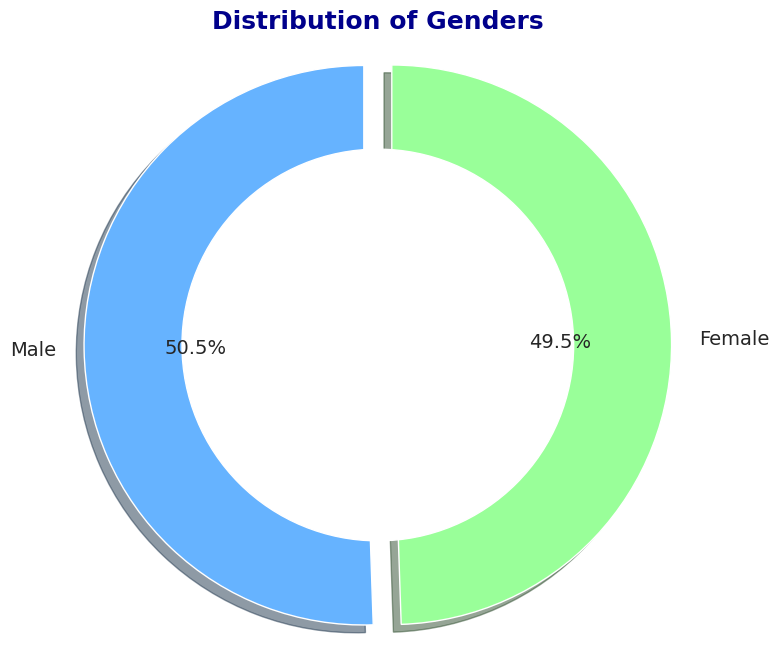

In [24]:
import matplotlib.pyplot as plt

# Calculate the counts for each gender category
gender_counts = data['Gender'].value_counts()

# Choose a color palette for the pie chart
colors = ['#66b3ff', '#99ff99', '#ffcc99']  # Soft and visually appealing colors

# Create the pie chart with enhanced features
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90,
        colors=colors, shadow=True, explode=[0.05]*len(gender_counts), textprops={'fontsize': 14})

# Add a title with improved font properties
plt.title('Distribution of Genders', fontsize=18, fontweight='bold', color='darkblue')

# Draw a circle in the middle to make it a donut chart (optional, for a modern look)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()
